<a href="https://colab.research.google.com/github/michaeldouglas/mba_IA_ML-proj_int-grupo_b/blob/main/Python/Trabalho_deep_learning_reinforcement_learning/Pulsar_Star_exercicio_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1_2

Utilizando o dataset Pulsar Star (disponível no repositório da disciplina e
em https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/)
construa uma Rede Neural MLP que classifique as amostras em
estrelas de nêutrons ou não.

## Definição do problema

Os pulsares são um tipo raro de estrela de nêutrons que produzem emissões de rádio detectáveis ​​aqui na Terra. 

Eles são de considerável interesse científico como sondas do espaço-tempo, do meio interestelar e dos estados da matéria. 

As ferramentas de aprendizado de máquina agora estão sendo usadas para rotular automaticamente os candidatos pulsares para facilitar a análise rápida. 

In [19]:
#@title importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#@title Carrega o dataset
dataset = pd.read_csv("pulsar_stars.csv")

### Verificação de dados nulos

Aqui nós vamos verificar os dados nulos do nosso modelo, além disso colocamos o resultado em um DataFrame para exibir o total encontrado X a proporção de valores nulos do nosso modelo.

In [3]:
dataset.isnull().mean(axis=1).loc[:10]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

In [4]:
dataset.isnull() # Aqui verificamos o total de null na base se existir
dataset.isnull().sum()/len(dataset) # Aqui obtemos a proporção de null se existir

# Criamos um novo DataFrame para verificar o total e a proporção de null na base
pd.DataFrame(zip(dataset.isnull().sum(),dataset.isnull().sum()/len(dataset)), columns=['Count', 'Proportion'], index=dataset.columns)

,Count,Proportion
Mean of the integrated profile,0,0.0
Standard deviation of the integrated profile,0,0.0
Excess kurtosis of the integrated profile,0,0.0
Skewness of the integrated profile,0,0.0
Mean of the DM-SNR curve,0,0.0
Standard deviation of the DM-SNR curve,0,0.0
Excess kurtosis of the DM-SNR curve,0,0.0
Skewness of the DM-SNR curve,0,0.0
target_class,0,0.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [6]:
dataset.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

### Observações finais

*   Não contém valores nulos
*   O número total de observações é de 17898
*   Os tipos com exceção do target_class são do tipo float64
*   No final acreditamos que os dados estão bons para separar em treino e testes sem nenhuma transformação ou alteração 

### Separação dos dados para treino e teste

A seguir separamos os dados para treino e testes e também já separamos nossa variávle target.

In [7]:
#@title Divide os dados em inputs (X) e outputs (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
#@title Normaliza os dados
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [9]:
#@title Converte os outputs para one-hot encoding
y = tf.keras.utils.to_categorical(y)

In [10]:
#@title Define a arquitetura da rede
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [11]:
#@title Compila a rede
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#@title Treina a rede
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
448/448 [==============================] - 5s 8ms/step - loss: 0.1228 - accuracy: 0.9652 - val_loss: 0.0330 - val_accuracy: 0.9922
Epoch 2/100
448/448 [==============================] - 3s 7ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.0358 - val_accuracy: 0.9894
Epoch 3/100
448/448 [==============================] - 2s 5ms/step - loss: 0.0789 - accuracy: 0.9767 - val_loss: 0.0327 - val_accuracy: 0.9885
Epoch 4/100
448/448 [==============================] - 2s 5ms/step - loss: 0.0772 - accuracy: 0.9779 - val_loss: 0.0337 - val_accuracy: 0.9902
Epoch 5/100
448/448 [==============================] - 2s 5ms/step - loss: 0.0761 - accuracy: 0.9778 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 6/100
448/448 [==============================] - 4s 8ms/step - loss: 0.0752 - accuracy: 0.9779 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 7/100
448/448 [==============================] - 3s 6ms/step - loss: 0.0752 - accuracy: 0.9776 - val_loss: 0.0300 - val_accuracy: 0.9894

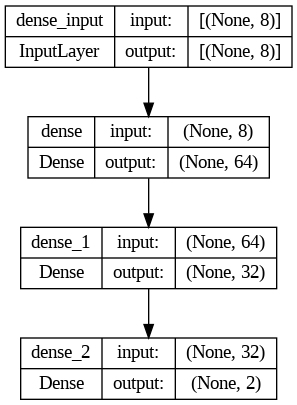

In [13]:
#@title Plot das camadas
plot_model(model, to_file='pulsar.png', show_shapes=True, show_layer_names=True)

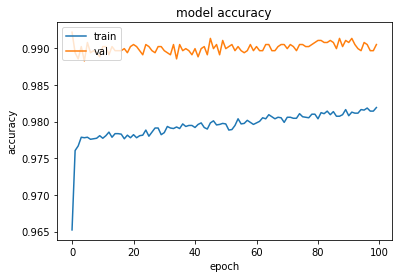

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
#@title Acurácia do nosso modelo
score = model.evaluate(X, y, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


accuracy: 98.41%


In [16]:
#@title Teste de predição
y_pred_out = model.predict(X)

560/560 [==============================] - 1s 1ms/step


In [17]:
y_pred_out

array([[9.9989015e-01, 1.0972233e-04],
       [9.9769080e-01, 2.3092490e-03],
       [9.6646696e-01, 3.3532962e-02],
       ...,
       [9.9221635e-01, 7.7835848e-03],
       [9.9984384e-01, 1.5610213e-04],
       [1.4026232e-01, 8.5973763e-01]], dtype=float32)

In [18]:
y_pred_out > 0.5

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [ ]:
y_pred_classes = (y_pred_out > 0.5).astype(int) 
y_pred_classes

### Considerações finais

O nosso modelo chegou em uma acurácia de 98.41%. Isso fornece um bom alvo para classificar amostras de estrelas de nêutrons ou não.